# **Section 6: Plotting**

**In this section we will cover how to create some basic graphs.**  

**First, lets load a data set.**

In [14]:
import pandas as pd

# Loads the data set into the data frame using the time stamp as the index
stock_data = pd.read_csv("example.csv", index_col='timestamp', parse_dates=True)

# Reverse the Data frame
stock_data = stock_data.iloc[::-1]

** Matplotlib.pyplot is a library commonly used for plotting data. A basic example of a graph is shown below. **  
[Documentation for Matplotlib](https://matplotlib.org/ "Matplotlib")  
[Documentation for plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot)

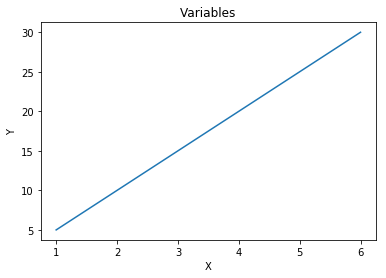

In [25]:
# Allows the plots to be correctly shown on jupyter notebooks
%matplotlib inline

# Importing matplotlib.pylot
# It is common to refer to it as plt
import matplotlib.pyplot as plt

# Closes any previous graphs
plt.close('all')

# Variables for the x axis
x = [1, 2, 3, 4, 5, 6]

# Variables for the y axis
y = [5, 10, 15, 20, 25, 30]

# Plots the values
plt.plot(x, y)

# Labels X axis
plt.xlabel("X")

# Labels Y axis
plt.ylabel("Y")

# Sets title
plt.title("Variables")

# Shows the graph
plt.show()

# Clears the graph from matplotlib
plt.close()

** Matplotlib.pyplot is composed of many different python objects. The outermost object is the Figure, which can contain multiple Axes. An Axes is essentially a single graph. Some of the other objects are X and Y labels, legends, text boxes, and lines. Almost any object within matplotlib can be customized to change your graphs, though we will only cover a few ways in this tutorial. **  
<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" alt="Diagram of Figure">
<img src="https://files.realpython.com/media/anatomy.7d033ebbfbc8.png" alt="Anatomy of a Figure">

**Scatter plots are used to show how much one variable is affected by another. This relationship is called correlation. Below we have graphed the open price of the stock to the volume of the stock on a scatter plot. There does not appear to be a correlation between the two columns. Each dot represents one of the entries in the data set.**  
[Documentation for scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter)

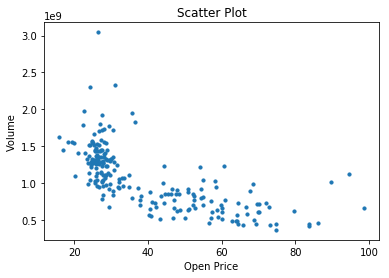

In [16]:
# Creates a scatter plot. The paramter s is the size of the dots
plt.scatter(stock_data['open'], stock_data['volume'], s = 10)

plt.xlabel('Open Price')

plt.ylabel('Volume')

plt.title('Scatter Plot')

plt.show()

plt.close()

** A bar chart is used to show differences among discrete categories **  
[Documentation for bar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html?highlight=bar#matplotlib.pyplot.bar)

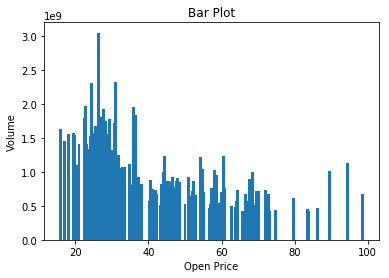

In [17]:
# Bar plot
plt.bar(stock_data['open'], stock_data['volume'])

plt.xlabel('Open Price')

plt.ylabel('Volume')

plt.title('Bar Plot')

plt.show()

plt.close()

** Histograms are used to show data distributions. The data is seperated into bins, which is done by dividing the range of values into intervals. Below, the closing prices of the stocks are seperated into bins on the x axis. The number of stock entries that are within each bin are counted on the y axis. We can see that the stock spend a long time in the 25 - 30 price range. **  
[Documentation for hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)

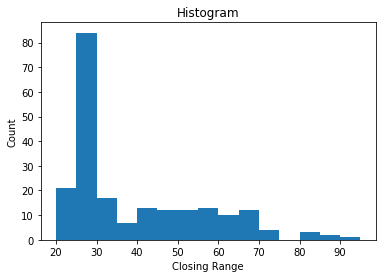

In [18]:
# Bins are the classes
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Creates a histogram, seperating the close prices into different classes
plt.hist(stock_data['close'], bins)

plt.xlabel('Closing Range')

plt.ylabel('Count')

plt.title('Histogram')

plt.show()

plt.close()

** Lets try making several graphs at once. **

Text(0,0.5,'Count')

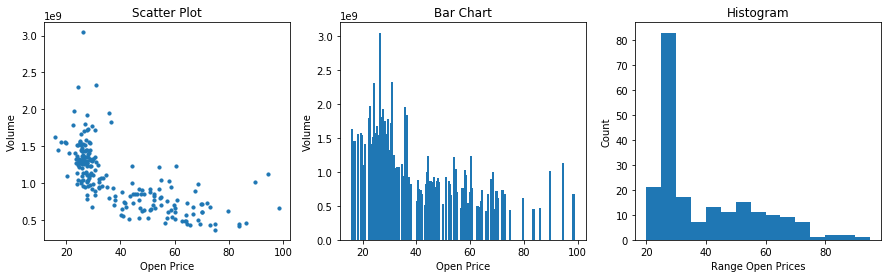

In [19]:
# .subplots returns the figure and the specified amount of axes
# param nrows is the number of rows for the charts to occupy, ncols is the number of columns for the charts to occupy
# (ncols * nrows) should match the number of Axes you desire

figure, (axes_1, axes_2, axes_3) = plt.subplots(nrows = 1, ncols=3, figsize=(15, 4))

# Here was are using the scatter function directly on axes 1 to create a scatter plot
axes_1.scatter(stock_data['open'], stock_data['volume'], s = 10)

# You must use the setter methods when interacting with an Axes directly.
axes_1.set_title("Scatter Plot")

axes_1.set_xlabel("Open Price")

axes_1.set_ylabel("Volume")

# Here was are using the scatter function directly on axes 2 to create a bar chart
axes_2.bar(stock_data['open'], stock_data['volume'])

axes_2.set_title("Bar Chart")

axes_2.set_xlabel("Open Price")

axes_2.set_ylabel("Volume")

# Here was are using the scatter function directly on axes 3 to create a histogram
axes_3.hist(stock_data['open'], bins)

axes_3.set_title("Histogram")

axes_3.set_xlabel("Range Open Prices")

axes_3.set_ylabel("Count")

** The data frame object from pandas has built in plotting functionality. Below, we have created two new data frames from two different stocks and combined the closing prices of the two stocks into one data frame. The .plot method is then called on the data frame to compare the closing prices between the two stocks. **  
[Documentation for pandas plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

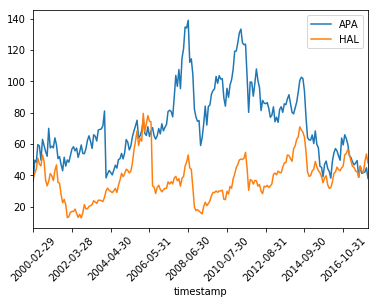

In [23]:
# A data frame is created from the halliburton data that comes with the tutorial
halliburton = pd.read_csv('monthly_HAL.csv', index_col='timestamp')

# Here we have reversed the data frame so that it starts with the oldest timestamp
halliburton = halliburton.iloc[::-1]

# A data frame is created from the apache data that comes with the tutorial
apache = pd.read_csv('monthly_APA.csv', index_col='timestamp')

# Here we have reversed the data frame so that it starts with the oldest timestamp
apache = apache.iloc[::-1]

# Here we created a new dataframe from the closing columns of the halliburton and pache data frames
# The names of the new columns and the source are contained in a python dictionary {}
two_stock = pd.DataFrame({'HAL': halliburton['close'], 'APA': apache['close']})

# The plot method plots the data frame. The rot parameter rotates the x axis labels so they do not overlap. 45 is 45 degrees
two_stock.plot(rot = 45)

** A scatter matrix can be used to show the correlation between various features(columns). pandas has a function to create a scatter matrix. As you can see from the matrix below, the price columns have a positive correlation with each other. The dividend and volume features do not appear to be correlated with each other or the other features.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DEBA7BE80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022DEC2FE518>]], dtype=object)

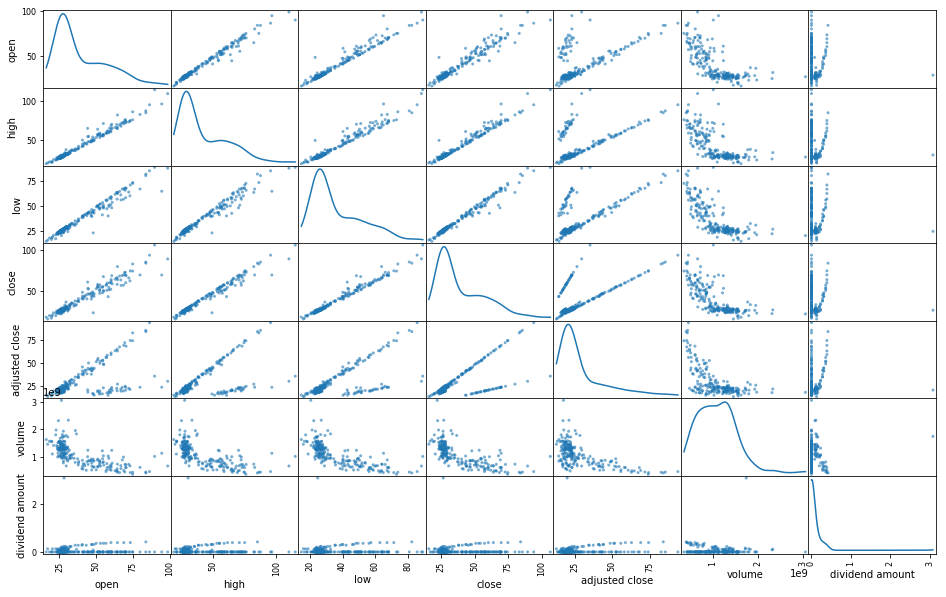

In [24]:
# Importing the scatter matrix function from pandas.plotting
from pandas.plotting import scatter_matrix

# Creates the scatter matric using the stock data data frame. Alpha correlates to the size of the points.
# Figsize is the size of the individual figures. 
scatter_matrix(stock_data, alpha = 0.6, figsize = (16,10), diagonal = 'kde')

### Practice

** Complete the code cells below and run them. **

In [ ]:
# Lets create a scatter plot with closing prices as the X axis and the High prices as the Y axis
# Uncomment the code and fill out what is missing

#plt.scatter()

#plt.xlabel()

#plt.ylabel()

#plt.title('Scatter Plot')

#plt.show()

#plt.close()

In [ ]:
# Lets take the two stocks, Halliburton and Apache, and compare their two High price features
# Uncomment the code and fill out what is missing
# Don't forget that the data frames for both stocks have already been created

#high_two_stock = pandas.DataFrame()

#two_stock.plot(rot = 45)